#**Project Description**

---

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

#**Importing Required Libraries**

In [85]:
# Importing necessary libraries >>

# For dealing with Dataframe >>
import pandas as pd
# For Dealing with Calculations >>
import numpy as np
# For dealing with Graphs >>
import matplotlib.pyplot as plt
import seaborn as sns

#**Load the Data**

In [86]:
# Load the dataset into df variable >>
df = pd.read_csv('./WA_Fn-UseC_-HR-Employee-Attrition.csv')

#**Explore the Data**

In [87]:
# Make all columns & rows of dataset as max to display >>
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# Lets look at top  Rows of Dataset >>
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [88]:
# Check the Shape of Dataset >>
print("[$] Rows Of Dataset >> ",df.shape[0])
print("[$] Columns Of Dataset >> ",df.shape[1])

[$] Rows Of Dataset >>  1470
[$] Columns Of Dataset >>  35


In [89]:
# Information of Dataset >> to get information about Columns & thier datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [90]:
# Check for missin values or Null values >>
print("[$] Null Values >> ",df.isnull().sum().sum())

[$] Null Values >>  0


In [91]:
# Get statistical distribution of the dataset >>
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


- **Age Distribution**:
  - The average age of employees is approximately 37 years, with a standard deviation of around 9 years.
  - The minimum age observed in the dataset is 18 years, while the maximum is 60 years.

- **Daily Rate**:
  - Employees' daily rates vary widely, with an average of around 802.
  - The daily rate ranges from a minimum of 102 to a maximum of 1499.

- **Distance from Home**:
  - On average, employees live approximately 9.2 units of distance from their workplace.
  - The distance from home ranges from a minimum of 1 unit to a maximum of 29 units.

- **Education**:
  - Employees' education levels are diverse, with an average education level of approximately 2.91.
  - The education level ranges from a minimum of 1 to a maximum of 5.

- **Monthly Income**:
  - The average monthly income is approximately $6503, with a considerable standard deviation of around $4708.
  - Monthly incomes vary widely, ranging from $1009 to $19999.

- **Years at Company**:
  - On average, employees have been with the company for around 7 years, with a standard deviation of approximately 6 years.
  - The tenure at the company ranges from a minimum of 0 years to a maximum of 40 years.

- **Years Since Last Promotion**:
  - The average duration since the last promotion is approximately 2.19 years, with a standard deviation of about 3.22 years.
  - Some employees have not been promoted yet, as indicated by a minimum value of 0 years, while the maximum is 15 years.

#**Exploratory Data Analysis**

<Axes: >

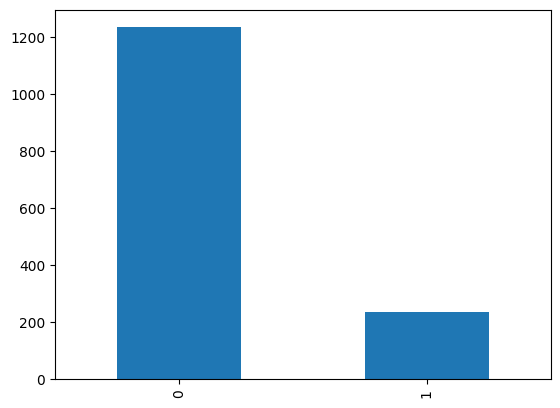

In [115]:
df['Attrition'].value_counts().plot(kind='bar')
# >> We can see some imbalanceness in dataset >> We can make use of SMOTE further

Class Imbalance Handling: If the dataset is imbalanced, where one class (e.g., attrition) is significantly underrepresented compared to the other class, techniques such as oversampling (e.g., Synthetic Minority Over-sampling Technique - SMOTE) or undersampling can be applied to balance the class distribution. This can help the model to learn better representations of the minority class and improve its performance.

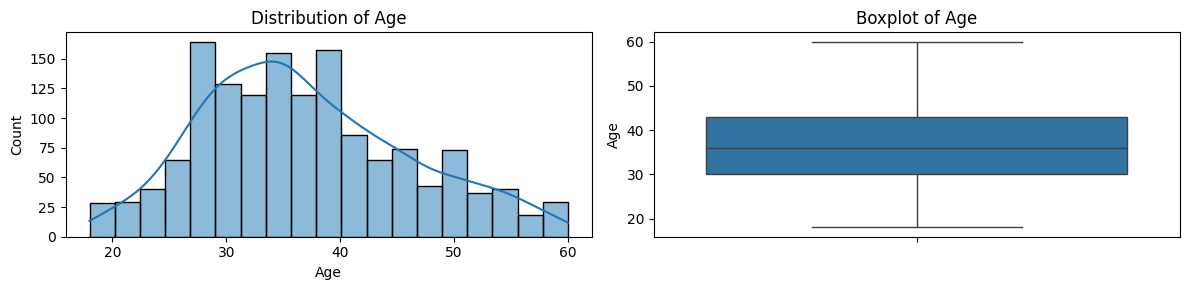

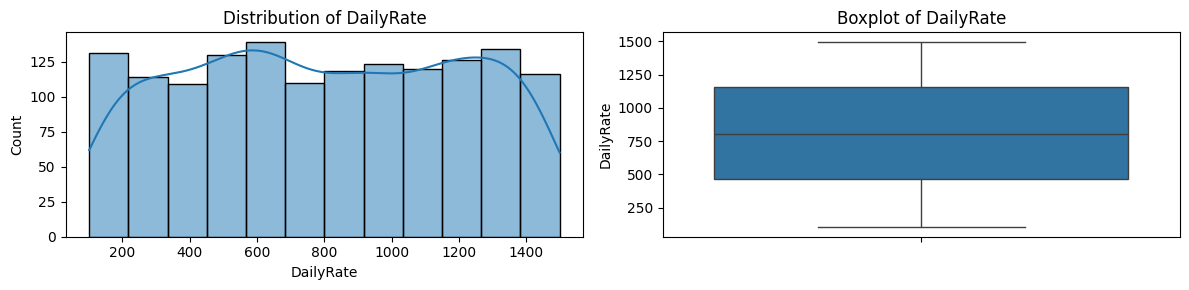

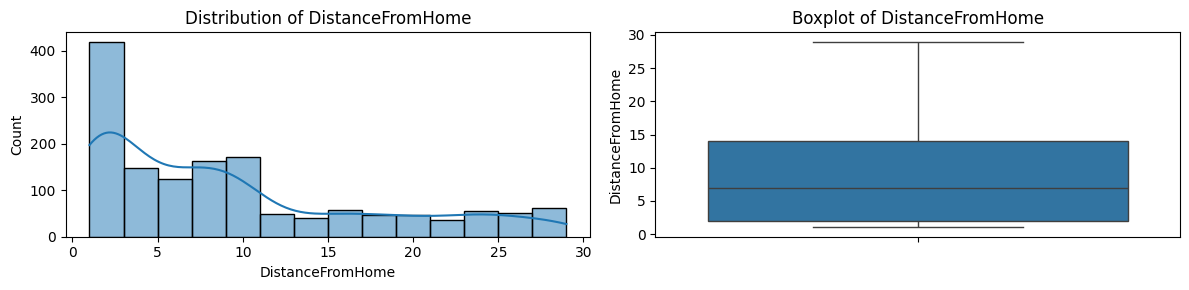

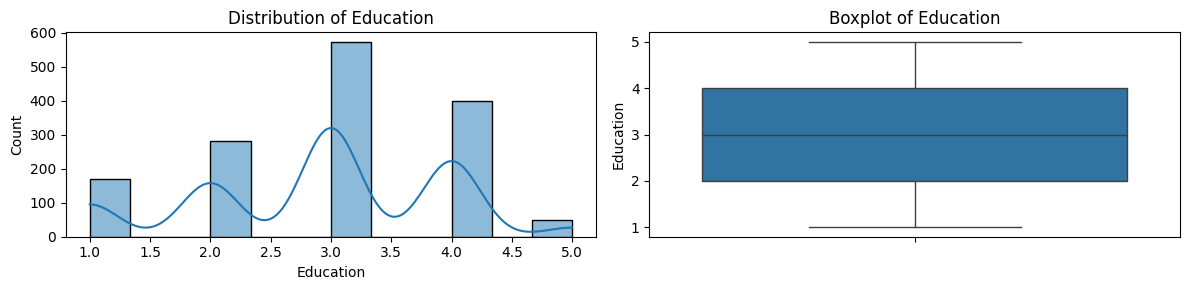

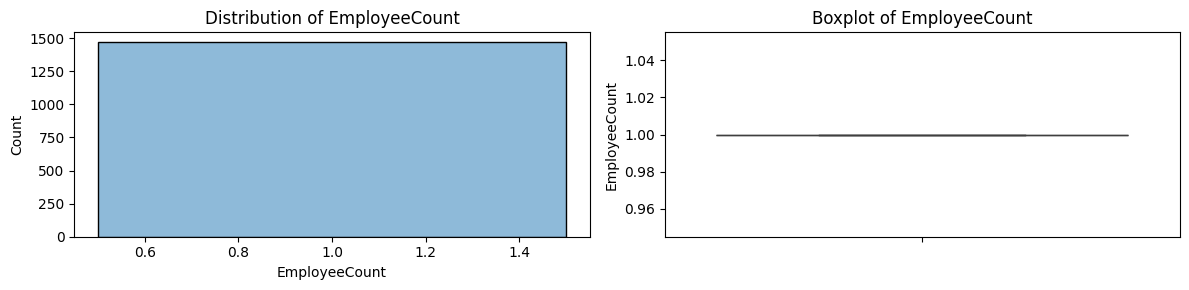

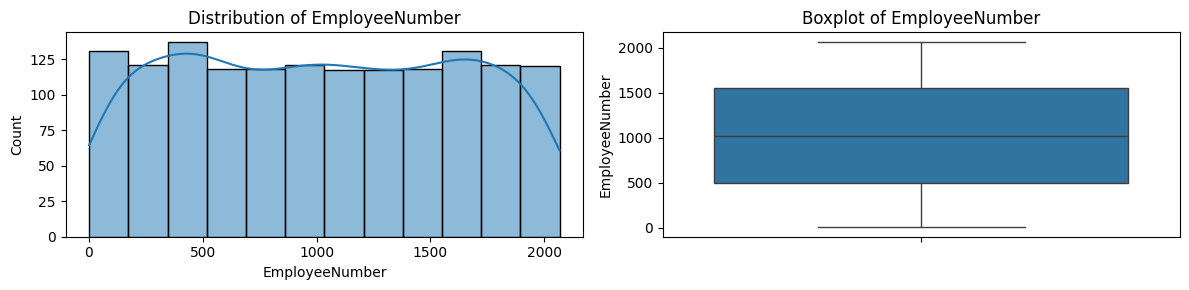

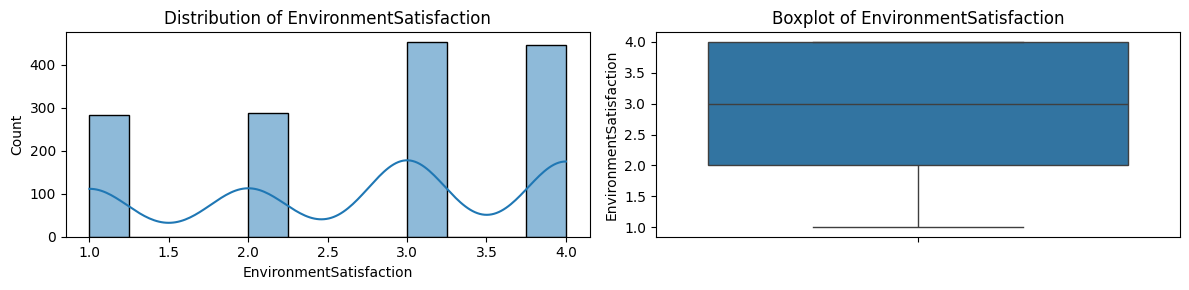

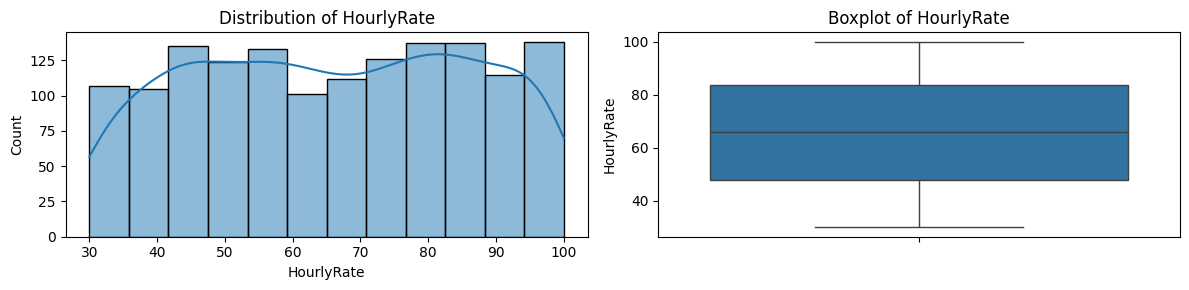

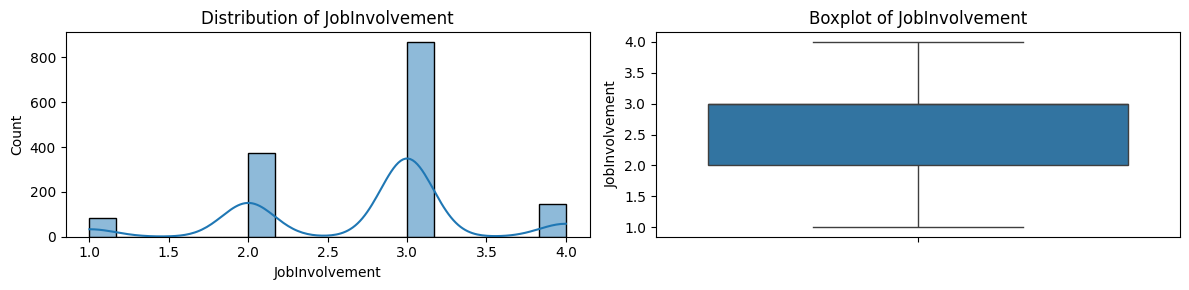

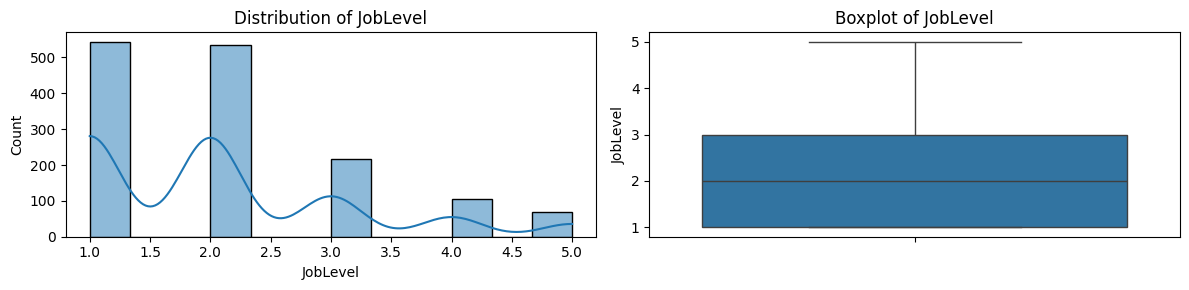

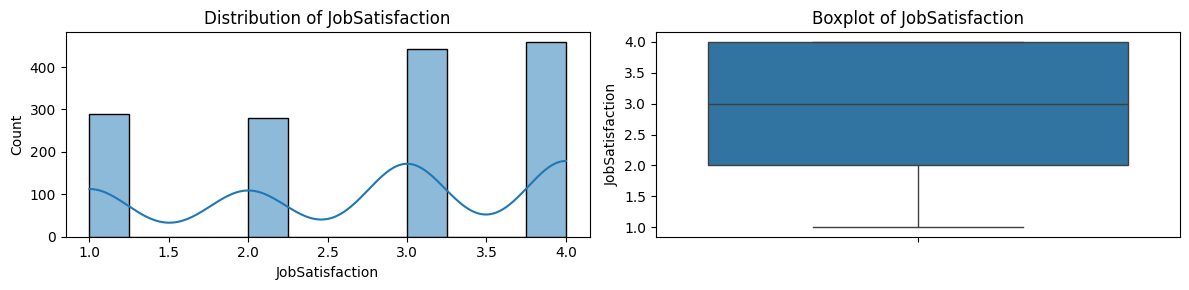

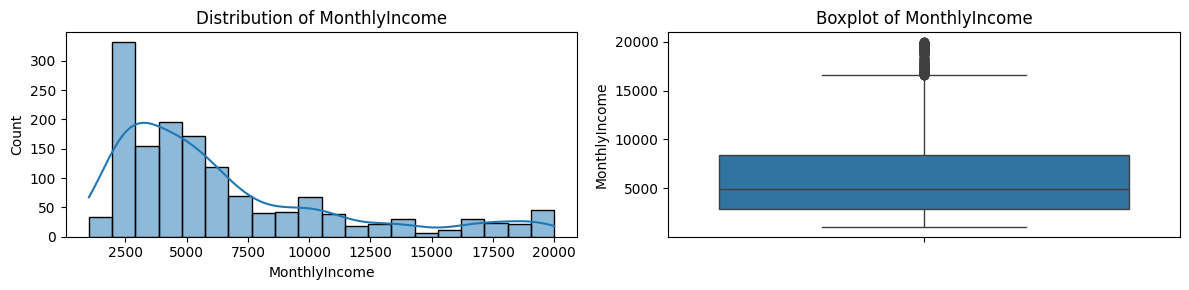

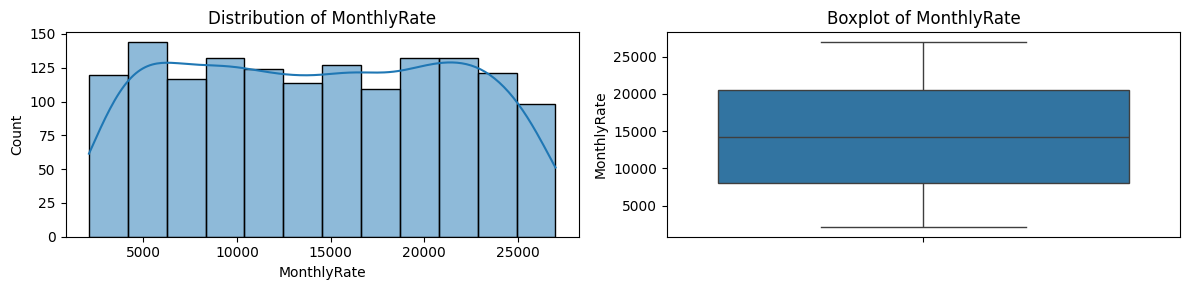

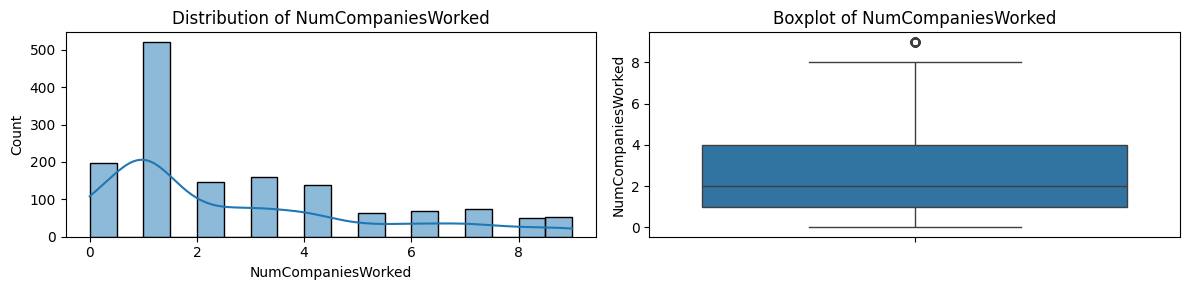

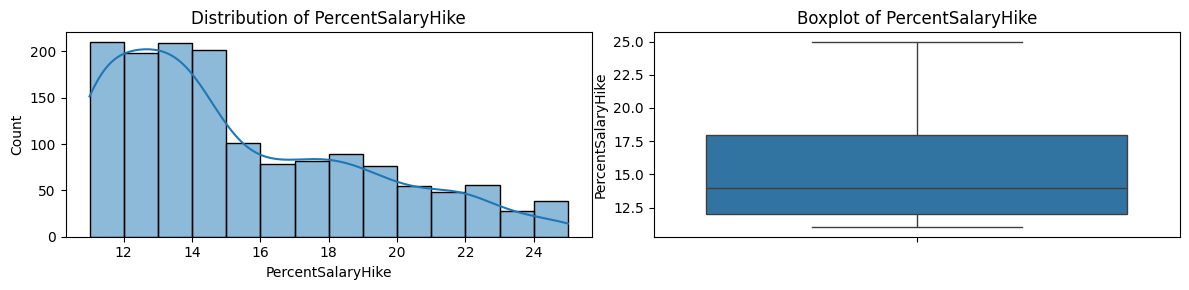

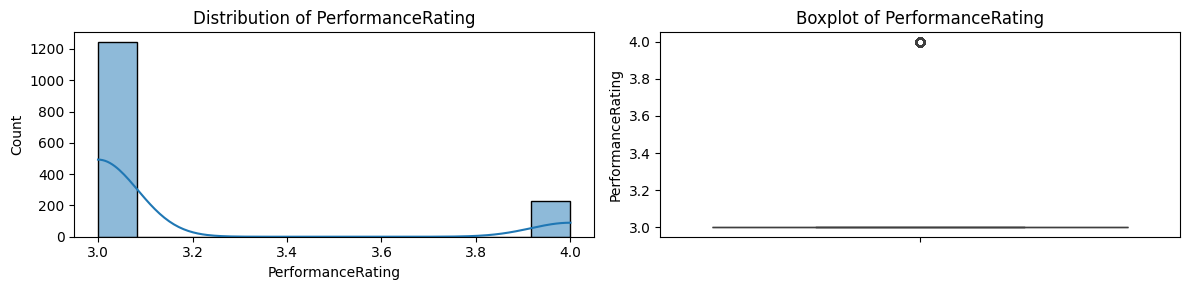

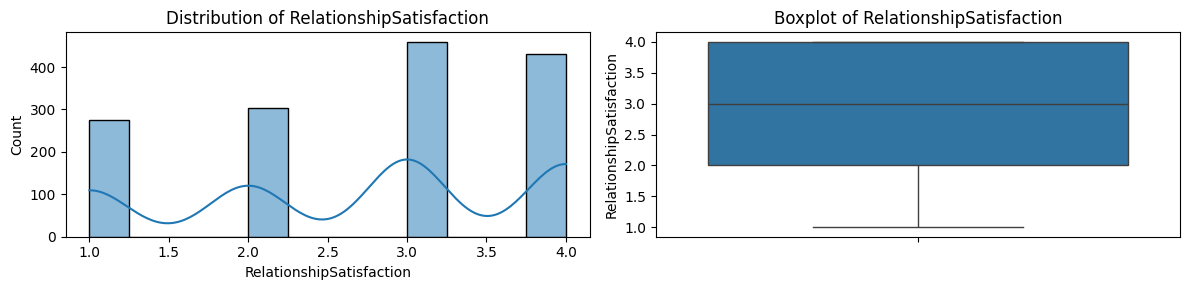

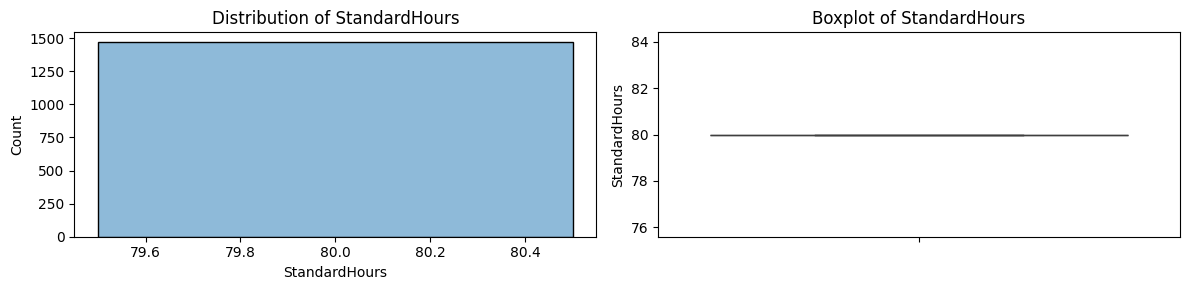

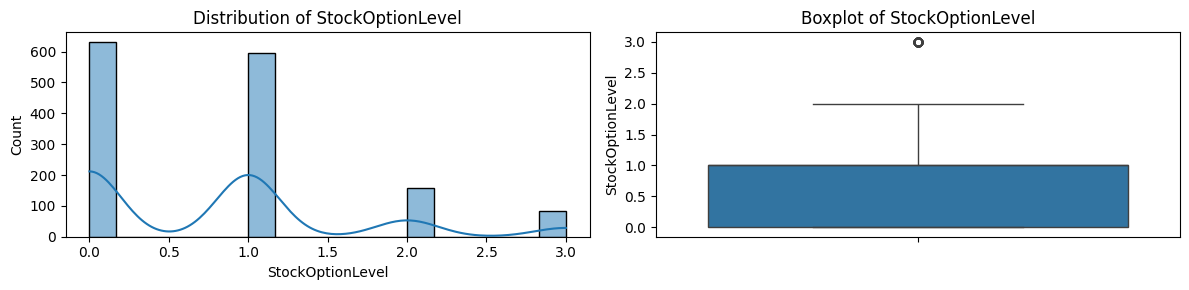

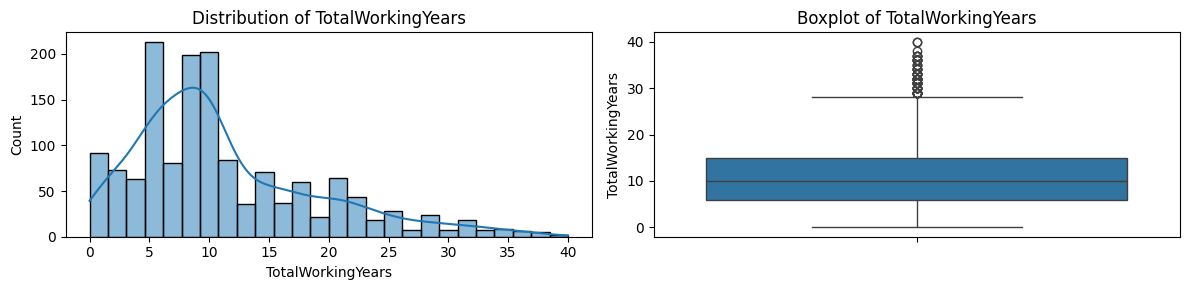

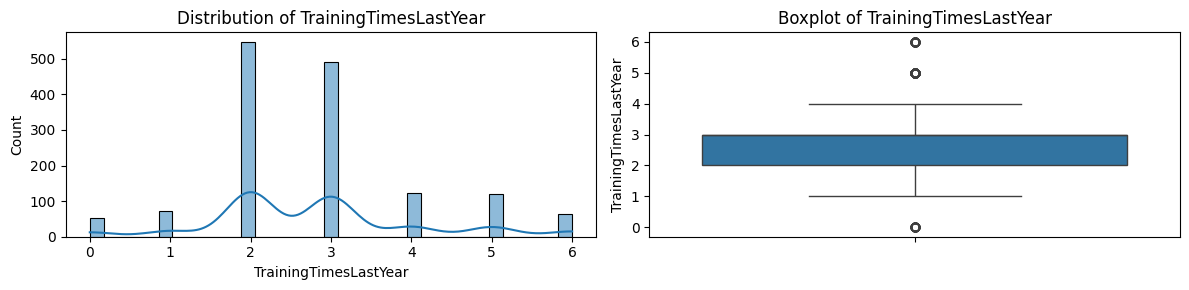

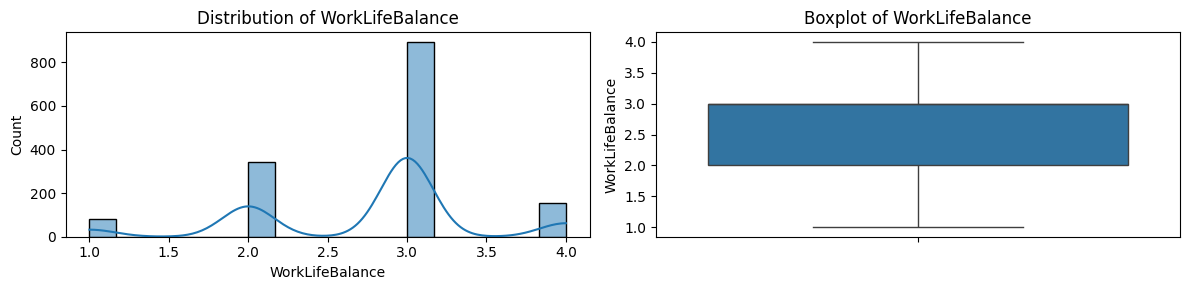

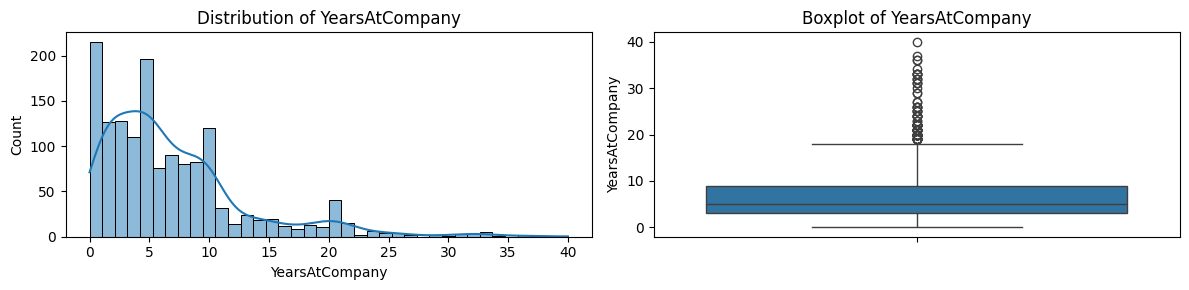

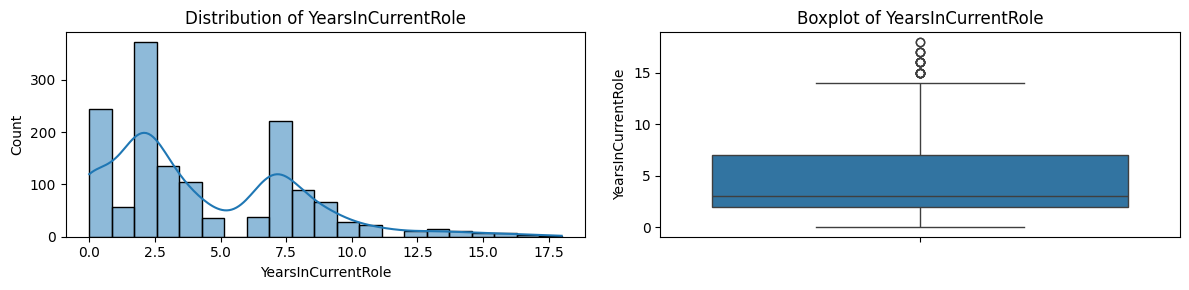

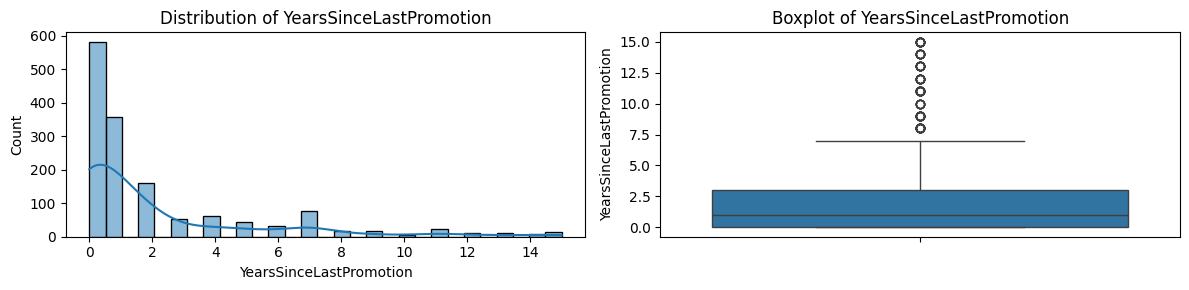

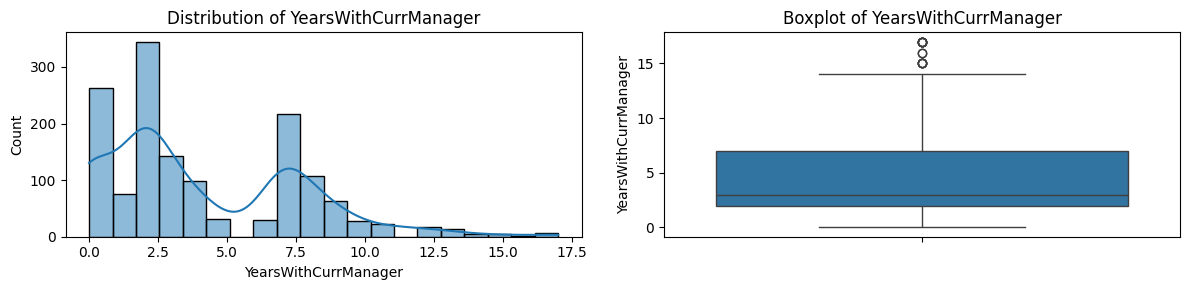

In [92]:
# Numerical features
numerical_features = df.select_dtypes(include=['int64']).columns
for feature in numerical_features:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))
    # Histogram
    sns.histplot(df[feature], kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution of {feature}')

    # Boxplot
    sns.boxplot(df[feature], ax=axes[1])
    axes[1].set_title(f'Boxplot of {feature}')

    plt.tight_layout()
    plt.show()

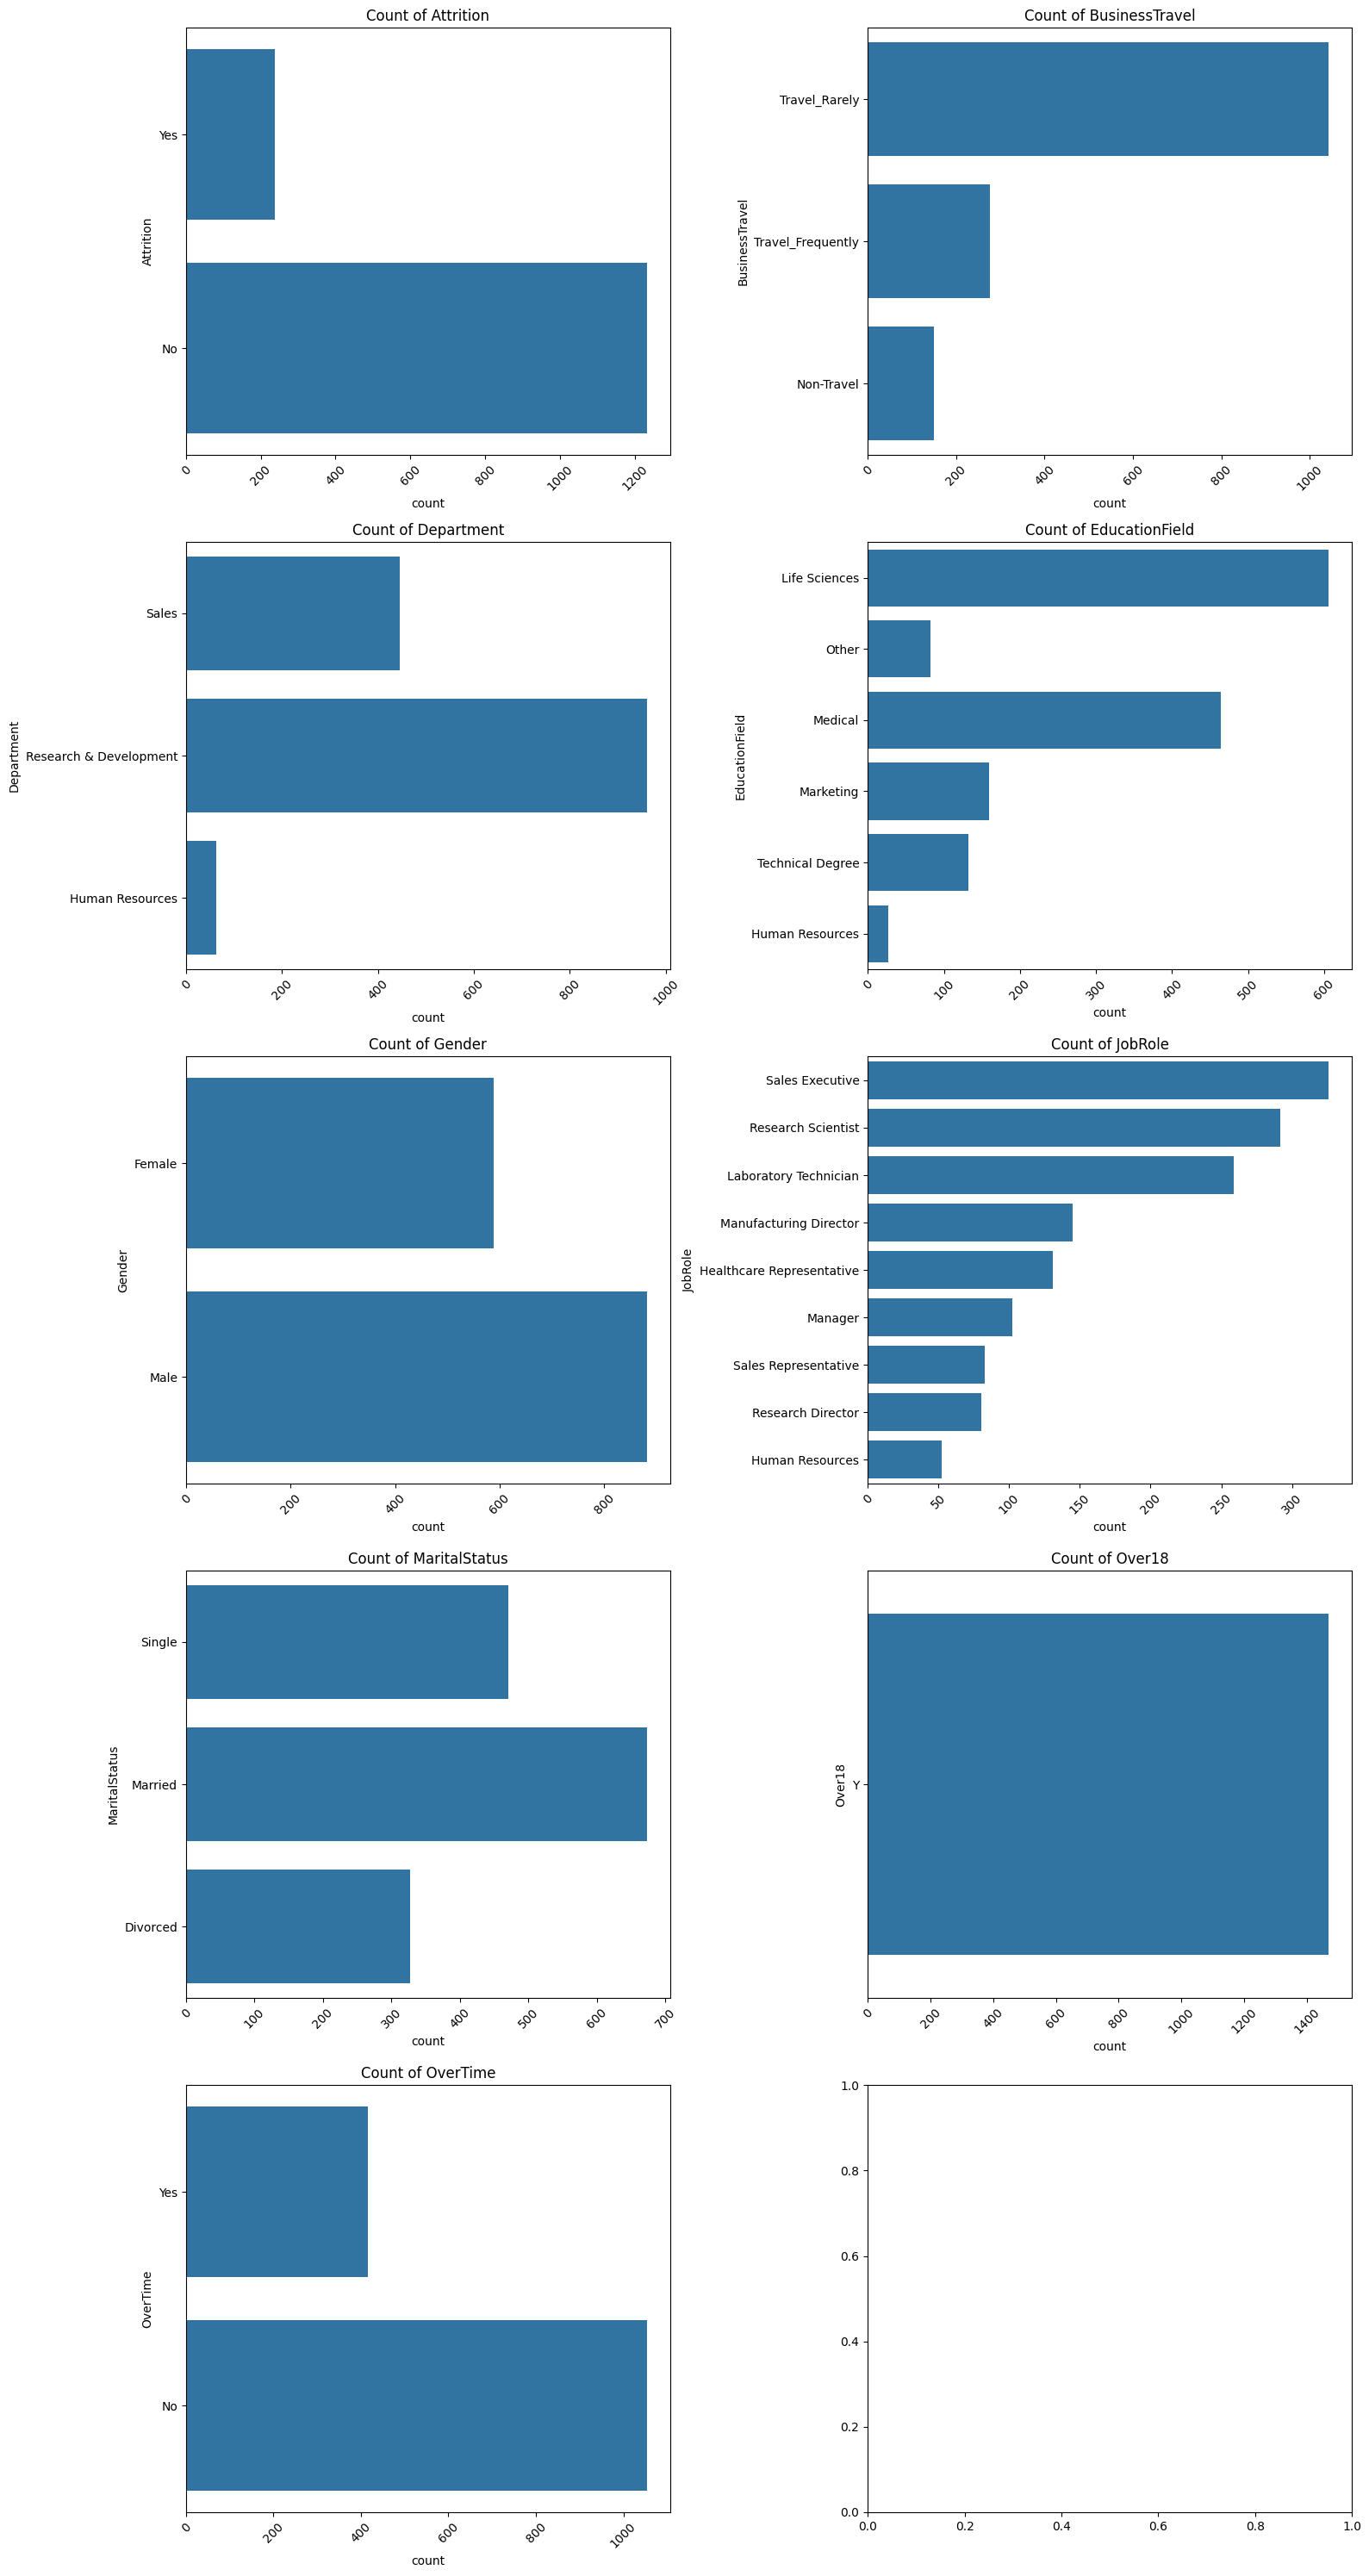

In [93]:
# Categorical features
categorical_features = df.select_dtypes(include=['object']).columns

num_plots = len(categorical_features)
num_rows = (num_plots + 1) // 2

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(16, num_rows*6))

for i, feature in enumerate(categorical_features):
    row = i // 2
    col = i % 2
    sns.countplot(df[feature], ax=axes[row, col])
    axes[row, col].set_title(f'Count of {feature}')
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

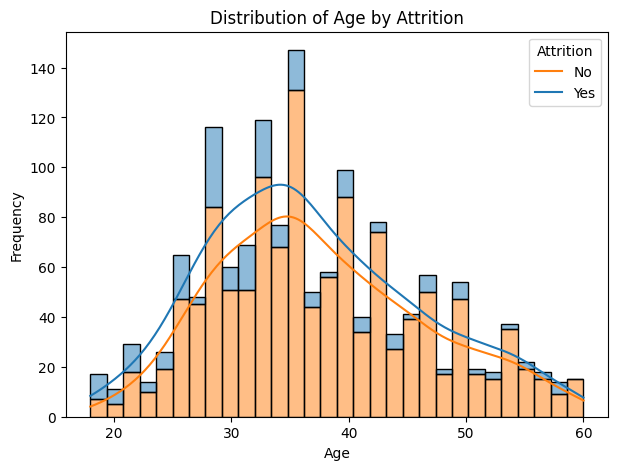

In [94]:
# Distribution of Age by Attrition
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='Age', hue='Attrition', kde=True, multiple='stack', bins=30)
plt.title('Distribution of Age by Attrition')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
plt.show()

# >> We can see Attrition Count is Max Yes for age 25
# >> Also we can see less Attrition count after age 35

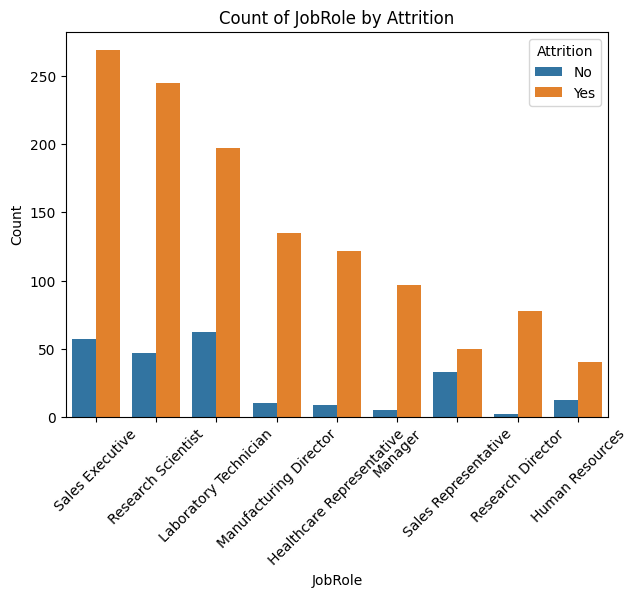

In [95]:
# Count of JobRole by Attrition
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='JobRole', hue='Attrition')
plt.title('Count of JobRole by Attrition')
plt.xlabel('JobRole')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
plt.show()

# >> We have max attrition rate for Sales Executive, followed by Research scientist

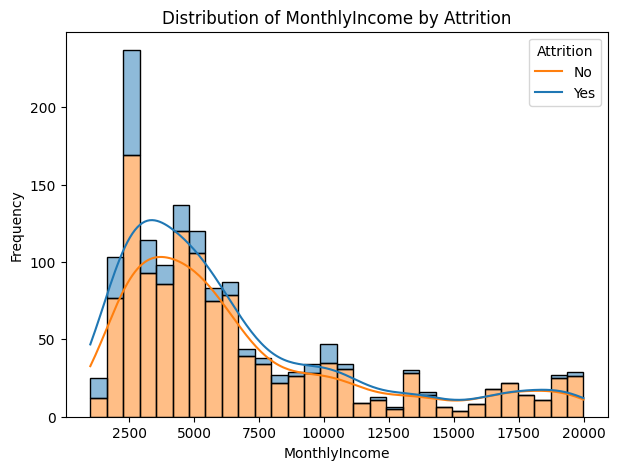

In [96]:
# Distribution of MonthlyIncome by Attrition
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='MonthlyIncome', hue='Attrition', kde=True, multiple='stack', bins=30)
plt.title('Distribution of MonthlyIncome by Attrition')
plt.xlabel('MonthlyIncome')
plt.ylabel('Frequency')
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
plt.show()

# >> We can see Max Attrition rate for People who has Monthly Income of 2500
# >> As monthly income increases Attrition count decreases

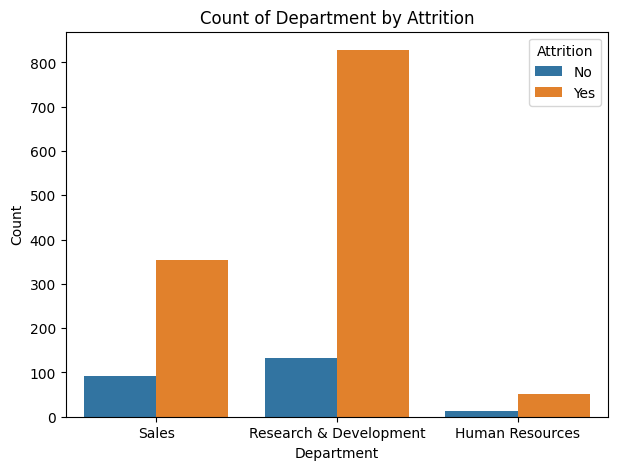

In [97]:
# Count of Department by Attrition
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title('Count of Department by Attrition')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
plt.show()

# >> We have max Attrition count for Research & Developement followed by Sales >>

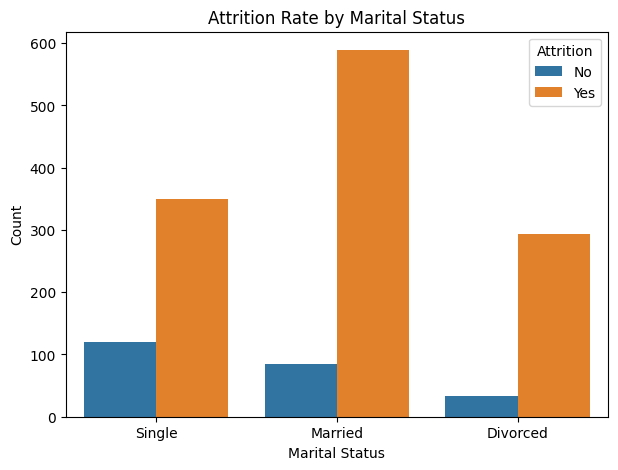

In [98]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='MaritalStatus', hue='Attrition')
plt.title('Attrition Rate by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
plt.show()

# We have more Attrition rate for Married people as compared to Single followed by divorced

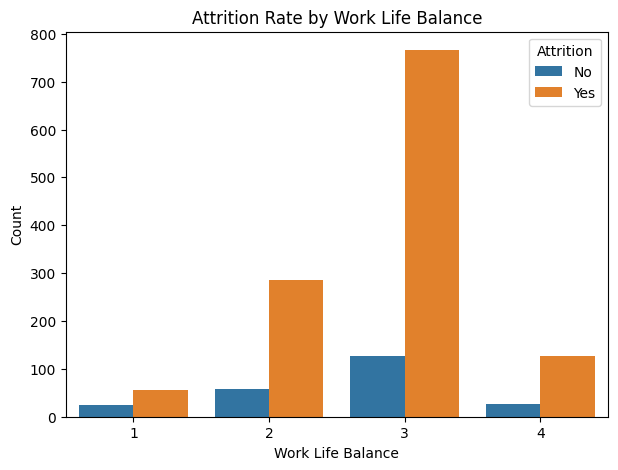

In [99]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='WorkLifeBalance', hue='Attrition')
plt.title('Attrition Rate by Work Life Balance')
plt.xlabel('Work Life Balance')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
plt.show()

# We have more Attrition rate whoes work life Balance is 3 >>

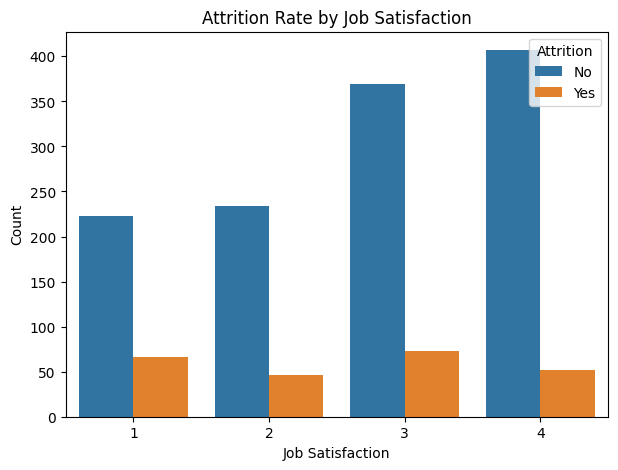

In [100]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='JobSatisfaction', hue='Attrition')
plt.title('Attrition Rate by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
plt.show()

#**Data Preprocessing**

In [101]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [102]:
print(df.select_dtypes(include=['object']).columns.tolist())

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [103]:
from sklearn.preprocessing import LabelEncoder

# Selecting categorical columns >>
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Applying LabelEncoder to each categorical column >>
label_encoders = {}
for column in categorical_columns:
    # Applying labelencoder >>
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [104]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2


In [105]:
# Check the datatypes of columns >>
df.dtypes

Age                         int64
Attrition                   int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

#**Data Splitting**

In [116]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


# Split the data into features (X) and target variable (y)
X = df.drop(columns=['Attrition'])  # Features
y = df['Attrition']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only to avoid data leakage
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#**Model Building**

In [117]:
# Model Building
models = {
    'Logistic Regression': LogisticRegression(),  # Instantiate Logistic Regression model
    'Decision Tree': DecisionTreeClassifier(),  # Instantiate Decision Tree Classifier model
    'Random Forest': RandomForestClassifier(),  # Instantiate Random Forest Classifier model
    'Support Vector Machine': SVC()  # Instantiate Support Vector Machine model
}

In [118]:

# Function to evaluate models
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        # Train each particular model on dataset
        model.fit(X_train, y_train)
        # Predict the models on test data
        y_pred = model.predict(X_test)
        # Check accuracy of model
        accuracy = accuracy_score(y_test, y_pred)
        # Classification report
        report = classification_report(y_test, y_pred)
        # Store output in results dict
        results[name] = {'Accuracy': accuracy, 'Classification Report': report}
    return results

In [119]:
# Evaluating models
results = evaluate_models(models, X_train_resampled, X_test, y_train_resampled, y_test)
print("Model Evaluation Results:")
for model, result in results.items():
    print(f"Model: {model}")
    print(f"Accuracy: {result['Accuracy']}")
    print(f"Classification Report:\n{result['Classification Report']}")
    print("---------------------------------------------")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Evaluation Results:
Model: Logistic Regression
Accuracy: 0.6768707482993197
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.69      0.79       255
           1       0.22      0.56      0.32        39

    accuracy                           0.68       294
   macro avg       0.57      0.63      0.55       294
weighted avg       0.82      0.68      0.73       294

---------------------------------------------
Model: Decision Tree
Accuracy: 0.7448979591836735
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       255
           1       0.23      0.38      0.29        39

    accuracy                           0.74       294
   macro avg       0.56      0.59      0.57       294
weighted avg       0.81      0.74      0.77       294

---------------------------------------------
Model: Random Forest
Accuracy: 0.8571428571428571
Classification Report:
   

#**Model Selection**

In [120]:
# Based on the performance metrics, select the best performing model >>
best_model = max(results, key=lambda x: results[x]['Accuracy'])
print(f'Best Model: {best_model}')

Best Model: Random Forest


In [125]:
# Save the best Linear Regression model >>
import joblib
joblib.dump(best_model, 'HR_Analytics_RF_model.pkl')

['HR_Analytics_RF_model.pkl']

#**HyperParameter Tunning**

In [111]:
# Hyperparameter Tuning >>

# Define the parameter grid for hyperparameter tuning using a dictionary.
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest.
    'max_depth': [None, 10, 20],  # Maximum depth of the tree. None means nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    'min_samples_split': [2, 5, 10],  # The minimum number of samples required to split an internal node.
    'min_samples_leaf': [1, 2, 4]  # The minimum number of samples required to be at a leaf node.
}

# Apply GridSearchCSV algorithim >>
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)

In [122]:
# Train on given data >>
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [123]:
# Retrieve the best hyperparameters found during grid search.
best_params = grid_search.best_params_

# Create a new RandomForestRegressor instance with the best hyperparameters.
rf_model_tuned = RandomForestClassifier(**best_params)

# Fit the RandomForestRegressor model with the best hyperparameters to the training data.
rf_model_tuned.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(n_estimators=300)

In [124]:
tuned_models = {
    'Tuned Random Forest': rf_model_tuned
}

# Evaluate tuned models
tuned_results = evaluate_models(tuned_models, X_train_resampled, X_test, y_train_resampled, y_test)
print(tuned_results)

{'Tuned Random Forest': {'Accuracy': 0.8571428571428571, 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.90      0.94      0.92       255\n           1       0.45      0.33      0.38        39\n\n    accuracy                           0.86       294\n   macro avg       0.68      0.64      0.65       294\nweighted avg       0.84      0.86      0.85       294\n'}}


Based on the evaluation results, the Random Forest (RF) model was selected as the best model for the HR Attrition Rate Classification project. Here's the rationale behind this choice:

1. **Accuracy:** The Random Forest model achieved the highest accuracy of 85.71% among all the models evaluated. Accuracy measures the proportion of correctly classified instances out of the total instances. A higher accuracy indicates better performance in correctly predicting employee attrition, making the Random Forest model the most effective in this regard.

2. **Precision and Recall:** The Random Forest model achieved a precision of 90% for predicting non-attrition cases (class 0), indicating that 90% of instances classified as non-attrition were indeed non-attrition cases. Additionally, it achieved a precision of 45% for predicting attrition cases (class 1), suggesting that 45% of instances classified as attrition were true attrition cases. Similarly, the recall for predicting non-attrition cases was 94%, while for predicting attrition cases it was 33%. These metrics indicate the model's ability to balance between correctly identifying non-attrition cases and identifying attrition cases.

3. **F1-score:** The F1-score, which is the harmonic mean of precision and recall, was reported as 92% for class 0 and 38% for class 1. The high F1-score for class 0 indicates good balance between precision and recall for non-attrition cases, while the lower F1-score for class 1 suggests room for improvement in correctly identifying attrition cases.

4. **Support:** The support refers to the number of instances of each class in the dataset. In this case, the support for class 0 (non-attrition) was 255, while for class 1 (attrition) it was 39. The imbalanced distribution of classes in the dataset may have contributed to the model's difficulty in predicting attrition cases.

Overall, the Random Forest model demonstrated the highest accuracy and balanced performance in predicting both non-attrition and attrition cases compared to other models. Therefore, it was chosen as the best model for predicting HR attrition rate in this project.